## Processing data


In [26]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
with open("intents.json", "r", encoding="utf-8") as f:
    data = json.load(f)



In [3]:
# diem so luong tag
tags = [intent["tag"] for intent in data["intents"]]
print("Số lượng tag:", len(tags))
print("Các tag:", tags)


Số lượng tag: 80
Các tag: ['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye', 'thanks', 'no-response', 'neutral-response', 'about', 'skill', 'creation', 'name', 'help', 'sad', 'stressed', 'worthless', 'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep', 'scared', 'death', 'understand', 'done', 'suicide', 'hate-you', 'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid', 'location', 'something-else', 'friends', 'ask', 'problem', 'no-approach', 'learn-more', 'user-agree', 'meditation', 'user-meditation', 'pandora-useful', 'user-advice', 'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2', 'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9', 'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15', 'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21', 'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27', 'fact-28', 'fact-29', 'fact-30', 'fact-31', 'fact-32']


In [4]:
df = pd.DataFrame(data['intents'])

dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df



,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [8]:
df_responses = df.explode('responses')
all_patterns = ' '.join(df['patterns'])

### 1 Word Cloud

In [30]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(all_patterns)


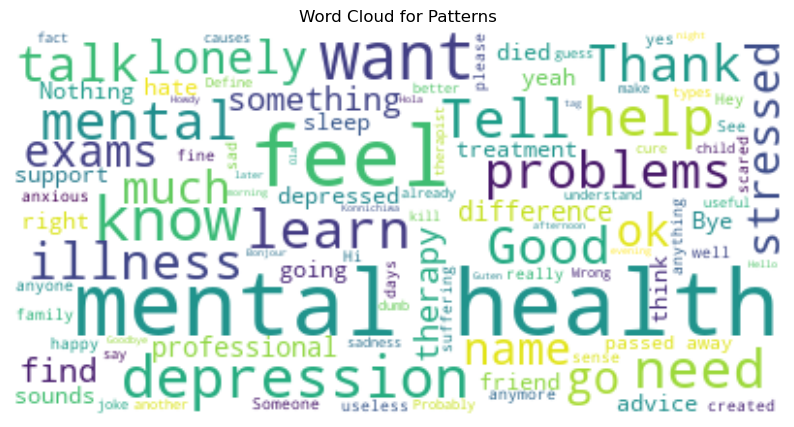

In [31]:
# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud for Patterns')
plt.show()

## 2. Patterns length Distrubution

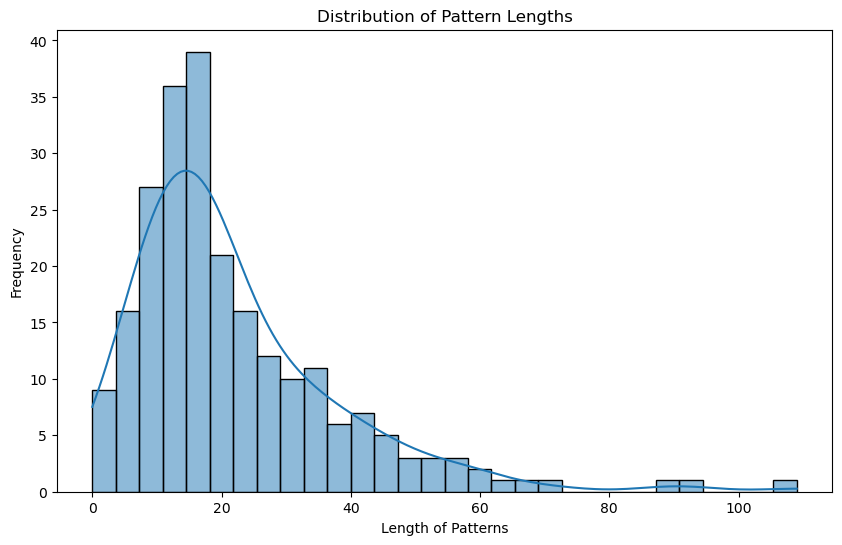

In [32]:
df['pattern_length'] = df['patterns'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['pattern_length'], bins=30, kde=True)
plt.title('Distribution of Pattern Lengths')
plt.xlabel('Length of Patterns')
plt.ylabel('Frequency')
plt.show()

### 3. Distribution of intents

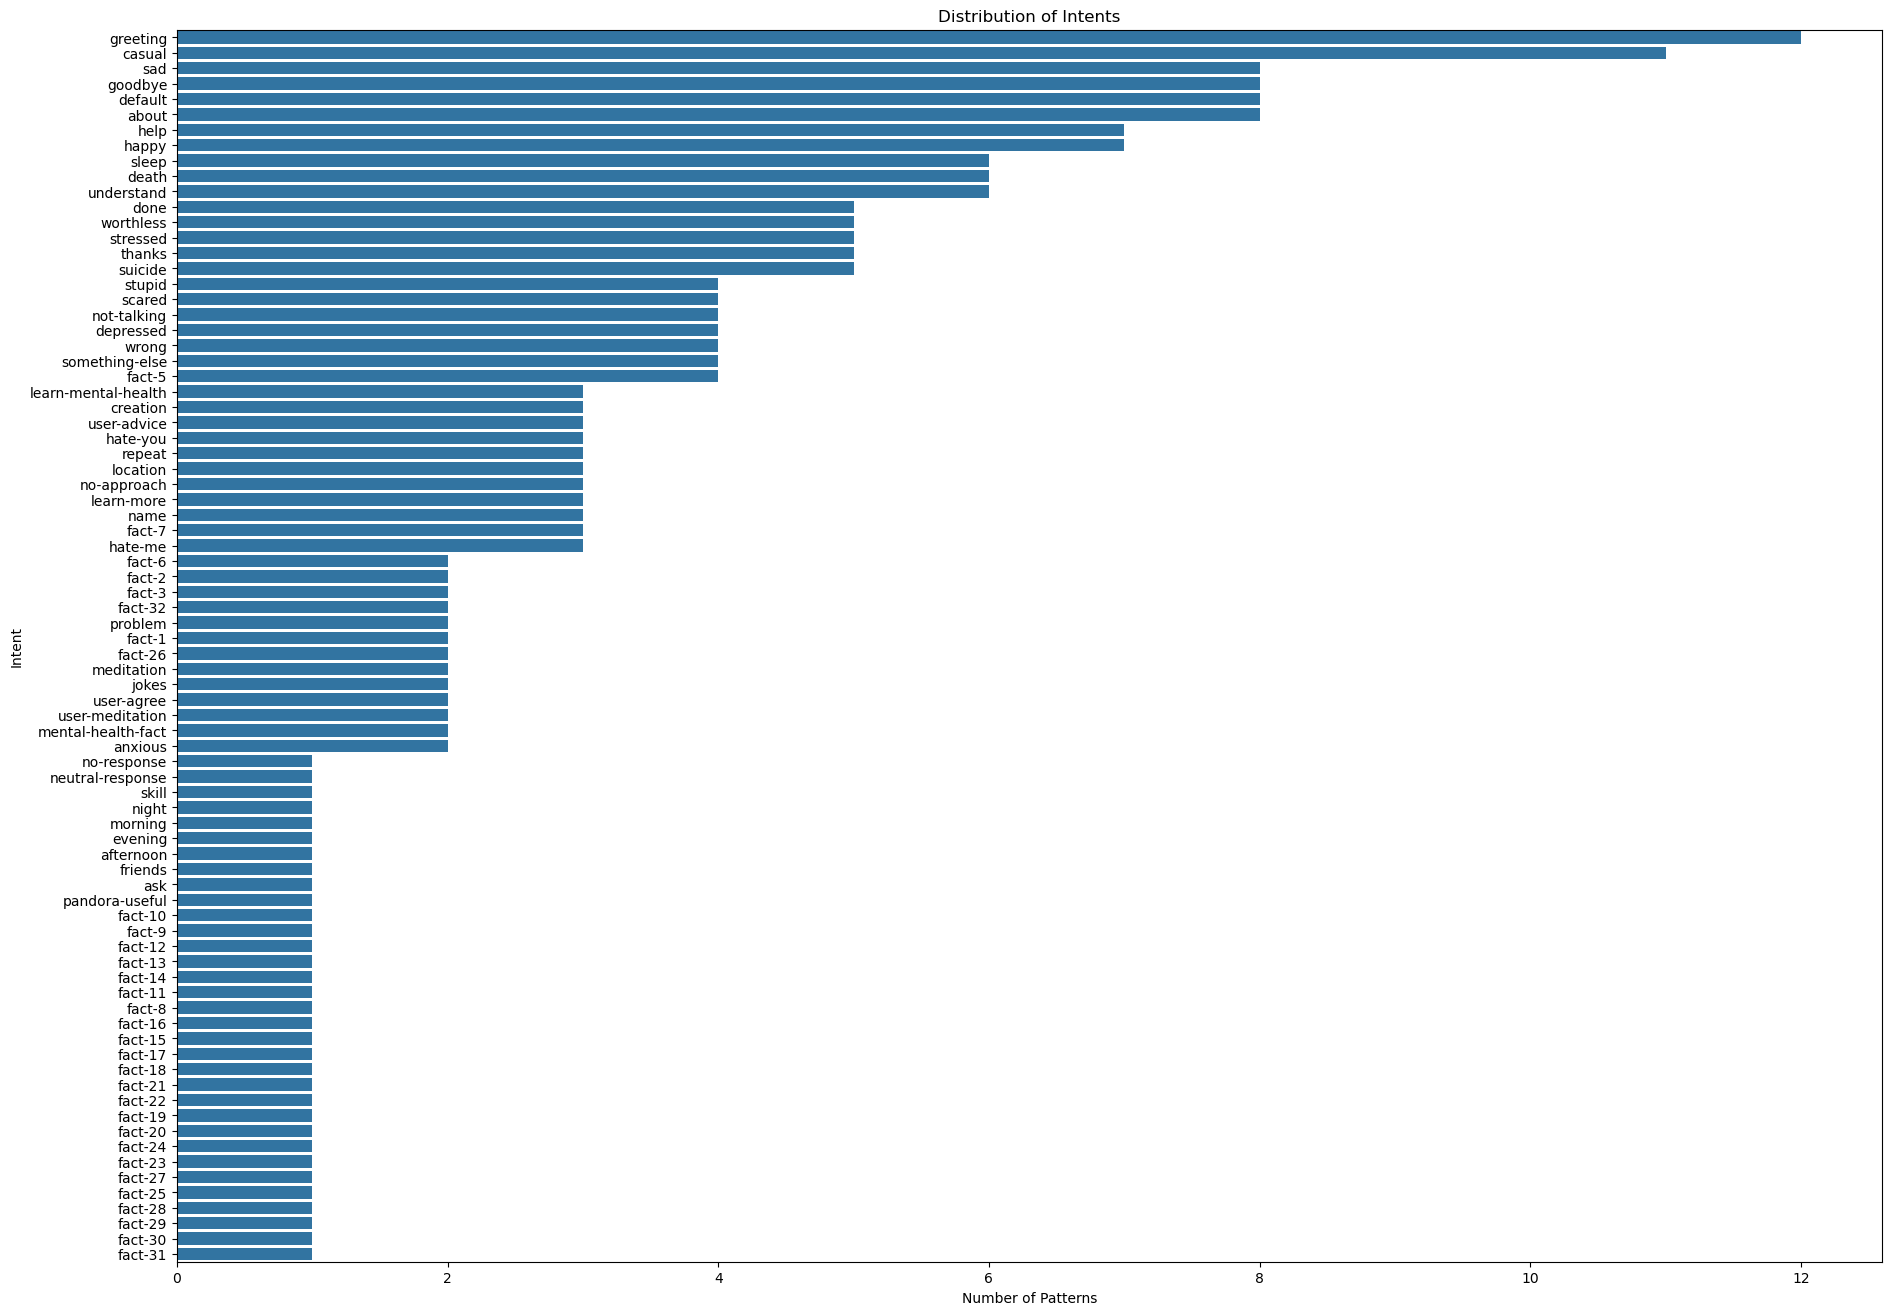

In [20]:
plt.figure(figsize=(22, 16))
sns.countplot(y='tag', data=df, order=df['tag'].value_counts().index)
plt.title('Distribution of Intents')
plt.xlabel('Number of Patterns')
plt.ylabel('Intent')
plt.show()


### 4. Number of Unique responses per internt

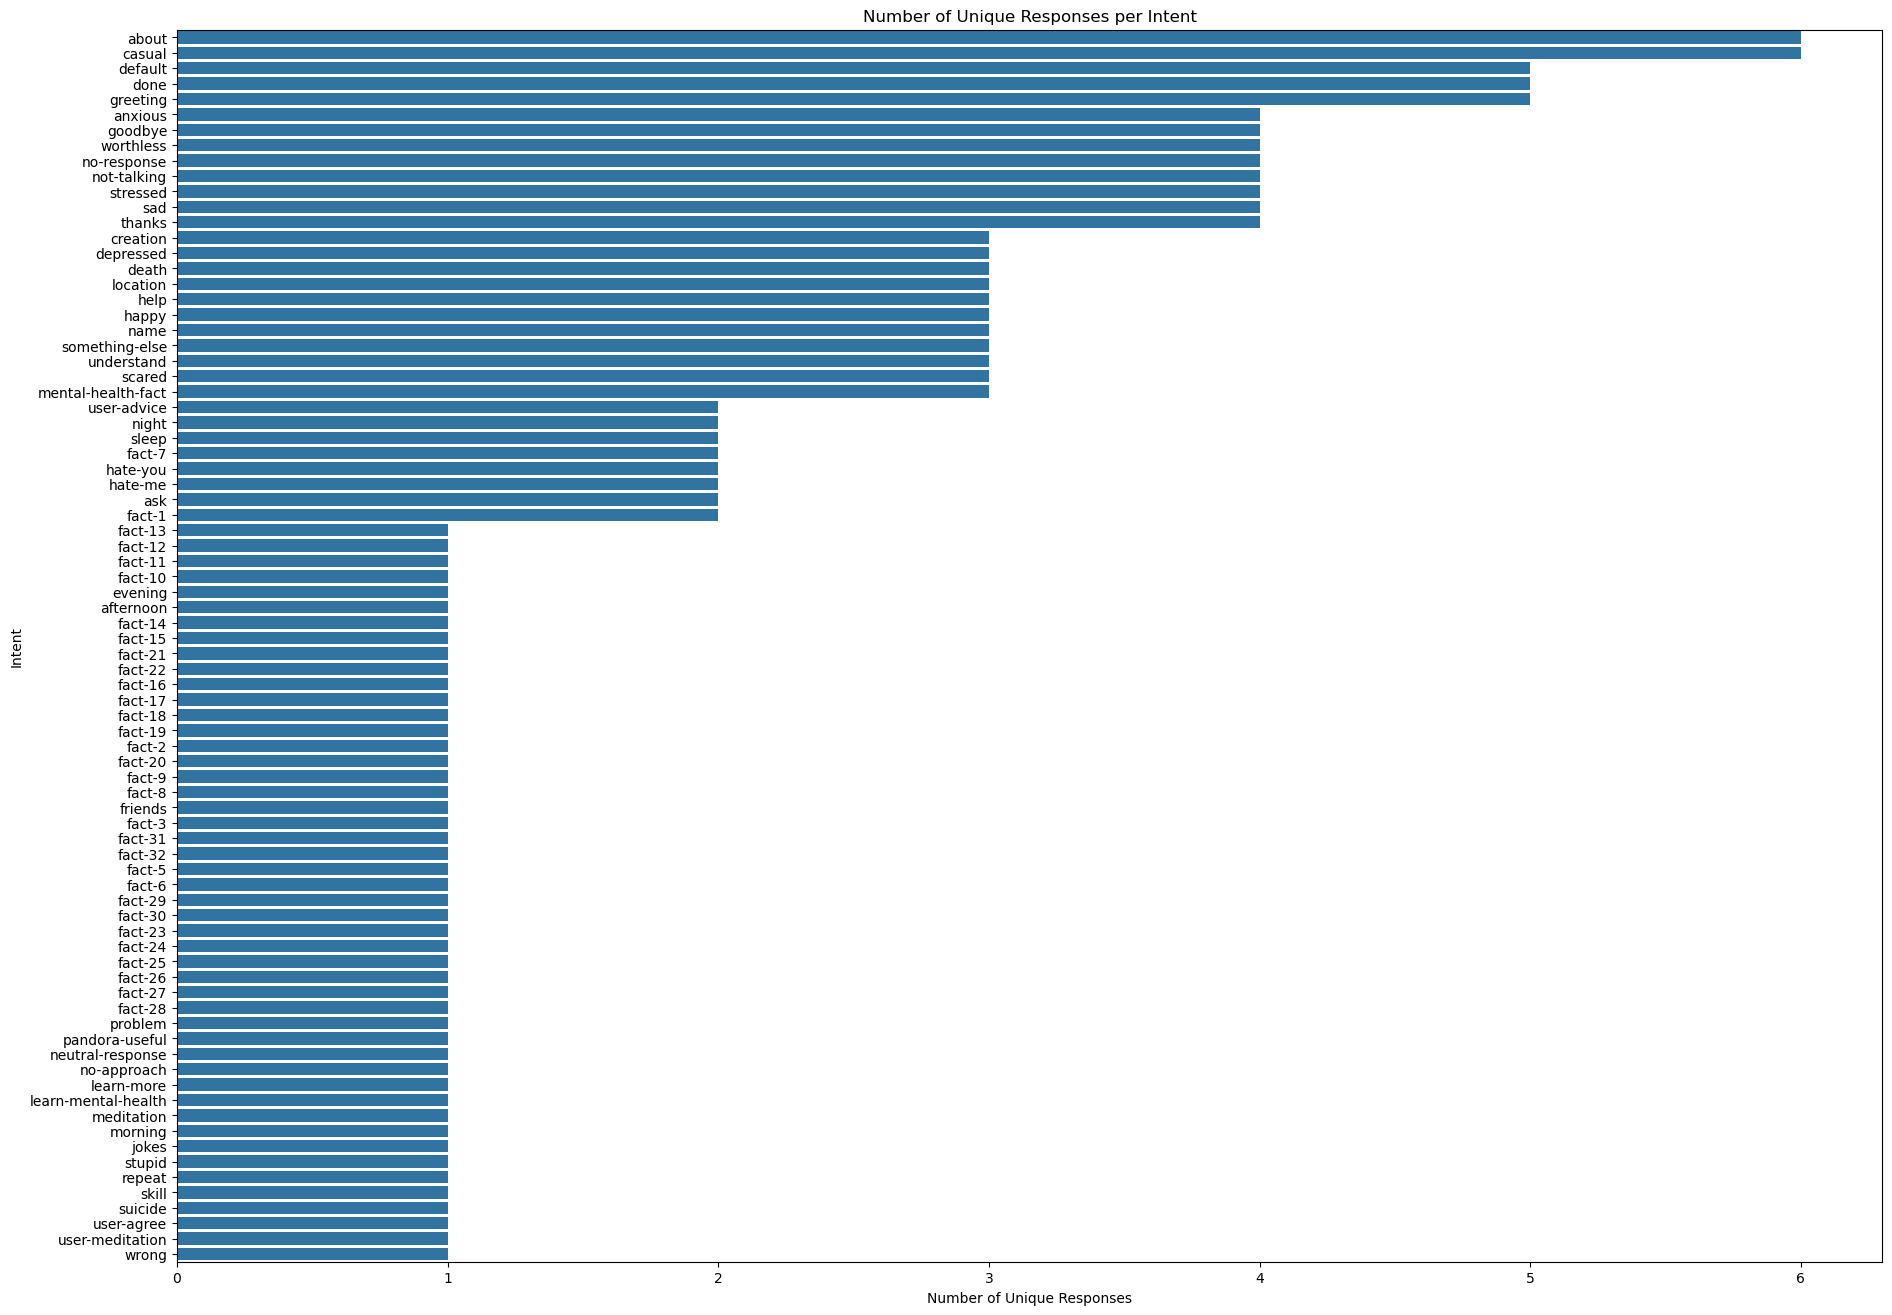

In [21]:
df_unique_responses = df_responses.groupby('tag')['responses'].nunique().reset_index(name='unique_responses')
plt.figure(figsize=(22, 16))
sns.barplot(x='unique_responses', y='tag', data=df_unique_responses.sort_values('unique_responses', ascending=False))
plt.title('Number of Unique Responses per Intent')
plt.xlabel('Number of Unique Responses')
plt.ylabel('Intent')
plt.show()

### 5. Responses length distribution

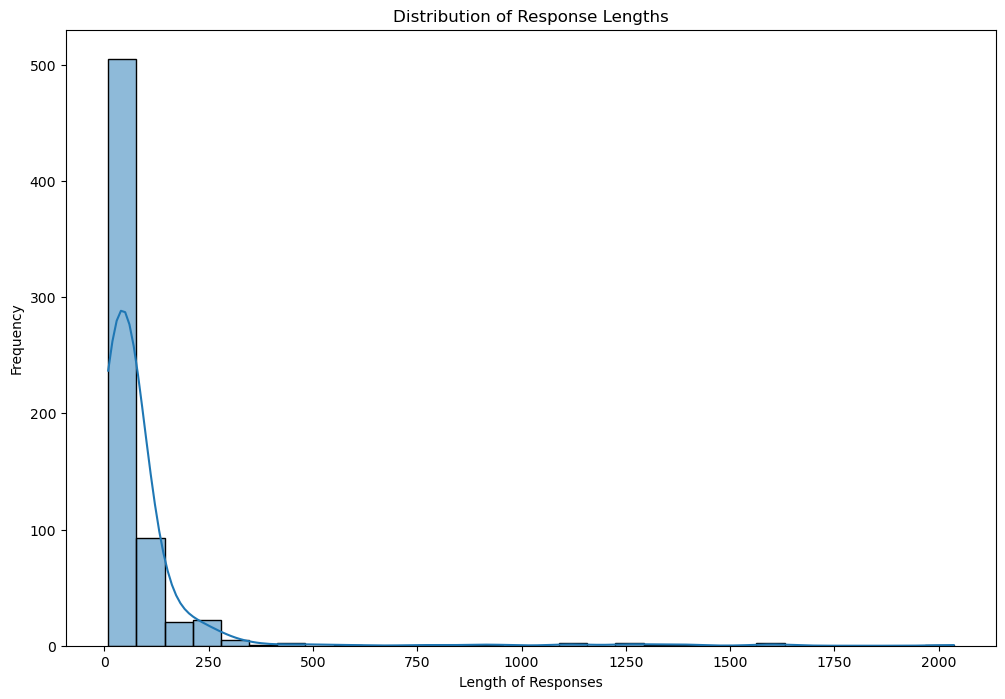

In [33]:
# Calculating response lengths from the exploded DataFrame
df_responses['response_length'] = df_responses['responses'].apply(len)
plt.figure(figsize=(12, 8))
sns.histplot(df_responses['response_length'], bins=30, kde=True)
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Responses')
plt.ylabel('Frequency')
plt.show()

## Preprocessing the dataset

In [34]:
# Preprocessing function
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_length
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3
2,greeting,is anyone there,[Hello there. Tell me how are you feeling toda...,15
3,greeting,hi there,[Hello there. Tell me how are you feeling toda...,8
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5
...,...,...,...,...
227,fact,how do i know if i'm unwell,"[If your beliefs , thoughts , feelings or beha...",27
228,fact,how can i maintain social connections what if ...,"[A lot of people are alone right now, but we d...",59
229,fact,what's the difference between anxiety and stress,[Stress and anxiety are often used interchange...,48
230,fact,what's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",52


In [28]:
X = df['patterns']
y = df['tag']

## Modele building

In [35]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from torch.optim import AdamW  
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

# Model and Optimization
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/asus/miniconda3/envs/datn/lib/python3.13/site-packages/transformers/tokenization_utils_base.py:2700: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the mo

## Training the model

In [ ]:
# Training Loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_dataloader)            
    print(f"Epoch {epoch+1}, Average Training Loss: {avg_train_loss:.2f}")

## Predicting

In [ ]:
def predict_intent(text):
    # Tokenize and encode the text for BERT
    encoded_dict = tokenizer.encode_plus(
        text,                      # Input text
        add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
        max_length=max_len,        # Pad or truncate to max length
        pad_to_max_length=True,    # Pad to max length
        return_attention_mask=True,# Construct attn. masks
        return_tensors='pt',       # Return pytorch tensors
    )
    
    # Extract input IDs and attention masks from the encoded representation
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    # No gradient calculation needed
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)
    
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()

    # Use softmax to calculate probabilities
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()


    # Get the predicted label with the highest probability
    predicted_label_idx = np.argmax(probabilities, axis=1).flatten()
    
    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)[0]
    
    return predicted_label, probabilities[0][predicted_label_idx]

In [ ]:
def intent_to_response(intent, df_responses):
    """
    Lấy response phù hợp dựa trên intent từ DataFrame responses
    
    Args:
        intent (str): Intent cần tìm response
        df_responses (DataFrame): DataFrame chứa các responses
        
    Returns:
        str: Response phù hợp với intent
        hoặc None nếu không tìm thấy intent
    """
    try:
        # Lấy tất cả responses cho intent
        responses = df_responses[df_responses['tag'] == intent]['responses'].values
        
        # Nếu có responses, chọn ngẫu nhiên một response
        if len(responses) > 0:
            # Chọn ngẫu nhiên một response từ danh sách
            import random
            selected_response = random.choice(responses)
            
            # Nếu response là list (như trong dữ liệu gốc), chọn ngẫu nhiên một câu trả lời
            if isinstance(selected_response, list):
                return random.choice(selected_response)
            return selected_response
        return None
    except Exception as e:
        print(f"Error getting response for intent {intent}: {e}")
        return None


In [ ]:
def test_model():
    print("Welcome to the Response Prediction Model!")
    print("Type 'exit' to quit the program.")
    
    while True:
        # Take user input
        user_input = input("Enter your message: ")
        
        # Exit condition
        if user_input.lower() == 'exit':
            print("Exiting the program. Goodbye!")
            break
        
        # Predict intent using the trained model
        predicted_intent, probability = predict_intent(user_input)
        
        # Fetch responses for the predicted intent
        responses = intent_to_response.get(predicted_intent, ["Sorry, I don't understand."])
        
        # Ensure responses is a list of strings
        if isinstance(responses, list) and all(isinstance(resp, list) for resp in responses):
            # Flatten the list if nested
            responses = [resp for sublist in responses for resp in sublist]
        
        # Choose a random response
        response = np.random.choice(responses) if responses else "Sorry, I don't understand."
        
        # Output the result
        print(f"Response: {response}")

# Call the test function to start the interactive loop
test_model()